In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import time

In [2]:
start_time = time.time()

In [3]:
tensorflow.random.set_seed(1234)

In [4]:
DATASET_PATH = './dataset/processed_dataset/'
TENSORFLOW_SAVED_MODEL_PATH = './tensorflow_saved_models/'
IMAGE_PATH = './images/'

In [5]:
datasets = pd.concat([pd.read_csv(file) for file in glob.glob(DATASET_PATH + '*')])

In [6]:
datasets.head()

,50.0,71.75421209117937,93.50842418235877,115.26263627353815,137.01684836471753,158.7710604558969,180.52527254707638,202.2794846382557,224.0336967294351,245.78790882061452,...,21825.966303270565,21847.720515361747,21869.474727452925,21891.228939544104,21912.983151635282,21934.737363726465,21956.491575817643,21978.245787908818,22000.0,class
0,0.000801,0.001457,0.002129,0.002763,0.003370,0.003945,0.004515,0.005036,0.005538,0.005981,...,0.008532,0.008513,0.008491,0.008484,0.008457,0.008454,0.008432,0.008421,0.008423,nc1_ncn5121_no4
1,0.000827,0.001476,0.002096,0.002775,0.003362,0.003950,0.004512,0.005057,0.005534,0.005997,...,0.008506,0.008514,0.008490,0.008488,0.008481,0.008448,0.008445,0.008432,0.008418,nc1_ncn5121_no4
2,0.000770,0.001462,0.002094,0.002737,0.003353,0.003949,0.004500,0.005031,0.005541,0.005990,...,0.008520,0.008506,0.008494,0.008479,0.008482,0.008457,0.008447,0.008437,0.008416,nc1_ncn5121_no4
3,0.000819,0.001452,0.002100,0.002755,0.003370,0.003962,0.004510,0.005017,0.005528,0.005978,...,0.008524,0.008516,0.008474,0.008483,0.008479,0.008464,0.008442,0.008435,0.008425,nc1_ncn5121_no4
4,0.000884,0.001472,0.002113,0.002735,0.003354,0.003940,0.004498,0.005016,0.005539,0.005994,...,0.008494,0.008499,0.008505,0.008468,0.008469,0.008445,0.008433,0.008433,0.008388,nc1_ncn5121_no4


In [7]:
X = datasets.iloc[:, 0:1010]
y = datasets['class']

In [8]:
print(f'Dataset size: {len(X)}')

Dataset size: 5000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, train_size=0.70)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = list(y_train)
y_test = list(y_test)

input_shape = X_train.shape

In [10]:
print(f'Training dataset size: {len(X_train)}')
print(f'Test dataset size: {len(X_test)}')

Training dataset size: 3500
Test dataset size: 1500


In [11]:
NUMBER_OF_CLASSES = 10

In [12]:
class_mapping = {'nc1_ncn5121_no4': 0, 'nc1_ncn5121_no5': 1, 'nc1_switch_sl2': 2, 'nc1_switch_dem': 3, 'nc1_nodevice': 4,
                 'nc2_ncn5121_no4': 5, 'nc2_ncn5121_no5': 6, 'nc2_switch_sl2': 7, 'nc2_switch_dem': 8, 'nc2_nodevice': 9,}

In [13]:
classes = ['nc1_ncn5121_no4', 'nc1_ncn5121_no5', 'nc1_switch_sl2', 'nc1_switch_dem', 'nc1_nodevice', 'nc2_ncn5121_no4', 'nc2_ncn5121_no5', 'nc2_switch_sl2', 'nc2_switch_dem', 'nc2_nodevice']

In [14]:
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])

In [15]:
y_train = to_categorical(y_train, NUMBER_OF_CLASSES).astype('int32')
y_test = to_categorical(y_test, NUMBER_OF_CLASSES).astype('int32')

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
def CNNClassifier():
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(input_shape[1], 1)))
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPool1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, input_shape=input_shape, activation='relu'))
    model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [18]:
cnn = CNNClassifier()
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1008, 16)          64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1006, 16)          784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 503, 16)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                80490     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 81,448
Trainable params: 81,448
Non-trainable params: 0
____________________________________________________

In [19]:
X_train_reshaped = np.reshape(X_train, (input_shape[0], input_shape[1], 1))
X_train_reshaped.shape

(3500, 1010, 1)

In [20]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_reshaped.shape

(1500, 1010, 1)

In [21]:
history_cnn = cnn.fit(X_train_reshaped, y_train, epochs=250, verbose=2, validation_split=0.2)

Epoch 1/250
88/88 - 3s - loss: 1.1465 - accuracy: 0.4993 - val_loss: 0.7005 - val_accuracy: 0.7914
Epoch 2/250
88/88 - 2s - loss: 0.5961 - accuracy: 0.7793 - val_loss: 0.4508 - val_accuracy: 0.8714
Epoch 3/250
88/88 - 2s - loss: 0.3271 - accuracy: 0.8839 - val_loss: 0.2200 - val_accuracy: 0.8900
Epoch 4/250
88/88 - 2s - loss: 0.1967 - accuracy: 0.9096 - val_loss: 0.1746 - val_accuracy: 0.9500
Epoch 5/250
88/88 - 1s - loss: 0.1641 - accuracy: 0.9364 - val_loss: 0.1377 - val_accuracy: 0.9614
Epoch 6/250
88/88 - 2s - loss: 0.1176 - accuracy: 0.9589 - val_loss: 0.1180 - val_accuracy: 0.9600
Epoch 7/250
88/88 - 2s - loss: 0.1049 - accuracy: 0.9675 - val_loss: 0.1077 - val_accuracy: 0.9586
Epoch 8/250
88/88 - 2s - loss: 0.0950 - accuracy: 0.9657 - val_loss: 0.0962 - val_accuracy: 0.9600
Epoch 9/250
88/88 - 2s - loss: 0.0900 - accuracy: 0.9679 - val_loss: 0.0842 - val_accuracy: 0.9700
Epoch 10/250
88/88 - 2s - loss: 0.0693 - accuracy: 0.9757 - val_loss: 0.0719 - val_accuracy: 0.9729
Epoch 11/

Epoch 82/250
88/88 - 2s - loss: 1.0842e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9986
Epoch 83/250
88/88 - 2s - loss: 1.0168e-04 - accuracy: 1.0000 - val_loss: 3.3557e-04 - val_accuracy: 1.0000
Epoch 84/250
88/88 - 2s - loss: 1.3924e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 85/250
88/88 - 2s - loss: 0.1365 - accuracy: 0.9736 - val_loss: 0.1592 - val_accuracy: 0.9071
Epoch 86/250
88/88 - 2s - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0140 - val_accuracy: 0.9986
Epoch 87/250
88/88 - 2s - loss: 0.0109 - accuracy: 0.9989 - val_loss: 0.0125 - val_accuracy: 0.9971
Epoch 88/250
88/88 - 2s - loss: 0.0098 - accuracy: 0.9993 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 89/250
88/88 - 2s - loss: 0.0077 - accuracy: 0.9996 - val_loss: 0.0077 - val_accuracy: 0.9986
Epoch 90/250
88/88 - 2s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9986
Epoch 91/250
88/88 - 2s - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.0107 - val_a

Epoch 160/250
88/88 - 2s - loss: 8.1469e-05 - accuracy: 1.0000 - val_loss: 8.9547e-05 - val_accuracy: 1.0000
Epoch 161/250
88/88 - 2s - loss: 5.8053e-05 - accuracy: 1.0000 - val_loss: 9.3695e-05 - val_accuracy: 1.0000
Epoch 162/250
88/88 - 2s - loss: 9.7566e-05 - accuracy: 1.0000 - val_loss: 1.0881e-04 - val_accuracy: 1.0000
Epoch 163/250
88/88 - 2s - loss: 6.3003e-05 - accuracy: 1.0000 - val_loss: 8.6152e-05 - val_accuracy: 1.0000
Epoch 164/250
88/88 - 2s - loss: 2.2073e-04 - accuracy: 1.0000 - val_loss: 7.9855e-05 - val_accuracy: 1.0000
Epoch 165/250
88/88 - 2s - loss: 0.1260 - accuracy: 0.9650 - val_loss: 0.0049 - val_accuracy: 0.9986
Epoch 166/250
88/88 - 2s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 167/250
88/88 - 2s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 168/250
88/88 - 2s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 169/250
88/88 - 2s - loss: 0.0010 - accuracy:

Epoch 236/250
88/88 - 2s - loss: 0.0081 - accuracy: 0.9996 - val_loss: 0.0208 - val_accuracy: 0.9957
Epoch 237/250
88/88 - 2s - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0217 - val_accuracy: 0.9971
Epoch 238/250
88/88 - 2s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0054 - val_accuracy: 0.9971
Epoch 239/250
88/88 - 2s - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9986
Epoch 240/250
88/88 - 2s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9986
Epoch 241/250
88/88 - 2s - loss: 8.2077e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9986
Epoch 242/250
88/88 - 2s - loss: 5.0999e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9986
Epoch 243/250
88/88 - 2s - loss: 7.2562e-04 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9986
Epoch 244/250
88/88 - 2s - loss: 0.0193 - accuracy: 0.9961 - val_loss: 0.0126 - val_accuracy: 0.9971
Epoch 245/250
88/88 - 2s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0011 -

In [22]:
 def get_report(model):
    pred = model.predict(X_test_reshaped)
    predictions = (pred > 0.5).astype("int32")
    print(classification_report(y_test, predictions, target_names=classes))
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions,  average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    return accuracy, precision, recall, f1, predictions

In [23]:
cnn_score = get_report(cnn)
predictions = cnn_score[4]
print(f'Accuracy: {cnn_score[0]}')
print(f'Precision: {cnn_score[1]}')
print(f'Recall: {cnn_score[2]}')
print(f'F1-Score: {cnn_score[3]}')

                 precision    recall  f1-score   support

nc1_ncn5121_no4       1.00      1.00      1.00       150
nc1_ncn5121_no5       1.00      1.00      1.00       150
 nc1_switch_sl2       1.00      1.00      1.00       150
 nc1_switch_dem       1.00      1.00      1.00       150
   nc1_nodevice       1.00      1.00      1.00       150
nc2_ncn5121_no4       1.00      1.00      1.00       150
nc2_ncn5121_no5       1.00      1.00      1.00       150
 nc2_switch_sl2       0.99      1.00      1.00       150
 nc2_switch_dem       1.00      0.99      1.00       150
   nc2_nodevice       1.00      1.00      1.00       150

      micro avg       1.00      1.00      1.00      1500
      macro avg       1.00      1.00      1.00      1500
   weighted avg       1.00      1.00      1.00      1500
    samples avg       1.00      1.00      1.00      1500

Accuracy: 0.9993333333333333
Precision: 0.9993377483443708
Recall: 0.9993333333333334
F1-Score: 0.9993333259258437


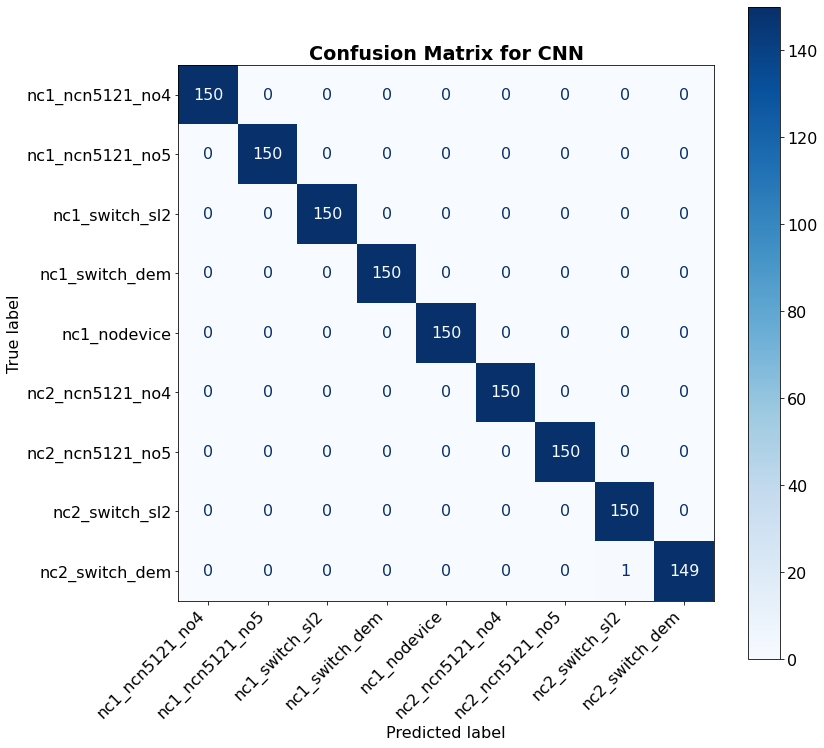

In [24]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(12, 12))
fig.tight_layout()
ax = fig.add_subplot(111)
plt.title('Confusion Matrix for CNN', fontweight='bold')

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), labels=range(9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(ax=ax, cmap='Blues', values_format='')
plt.xticks(rotation=45, ha='right')

plt.savefig(IMAGE_PATH + 'cnn_confusion_matrix.pdf', bbox_inches='tight')

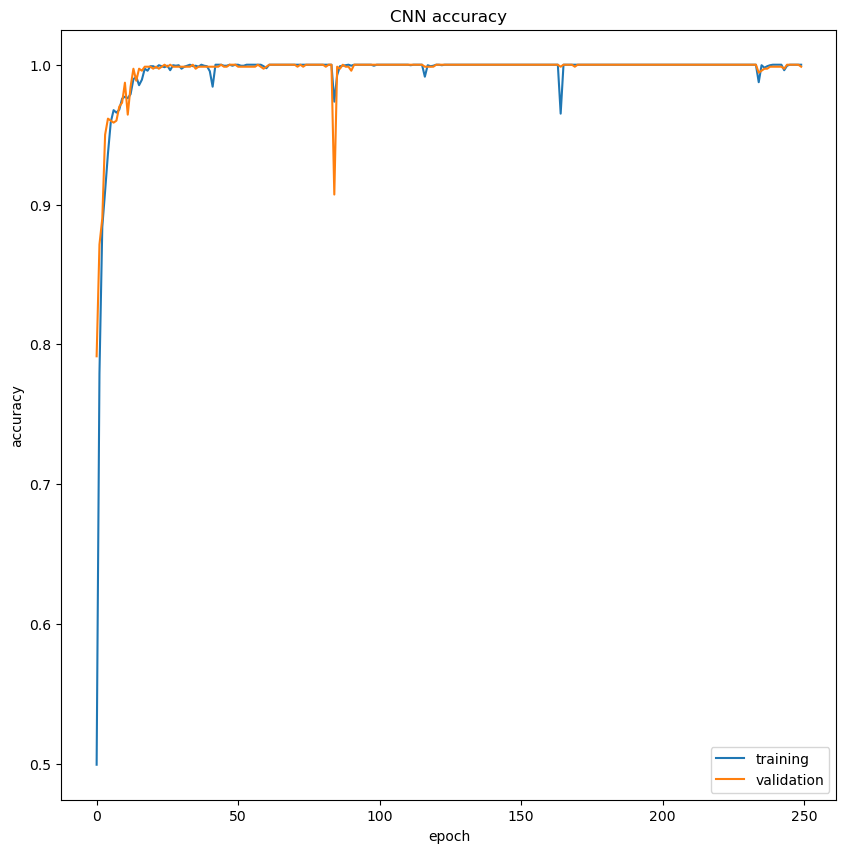

In [25]:
plt.rcdefaults()
fig = plt.figure(figsize=(10, 10))

plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

plt.savefig(IMAGE_PATH + 'cnn_accuracy.pdf', bbox_inches='tight')

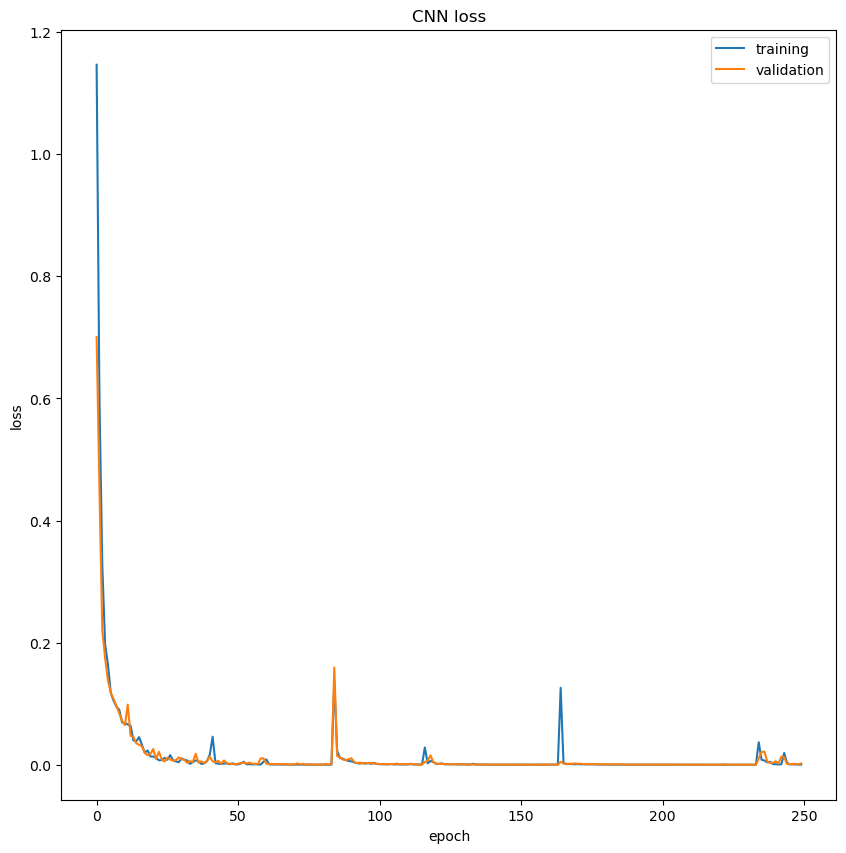

In [26]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

plt.savefig(IMAGE_PATH + 'cnn_loss.pdf', bbox_inches='tight')

# Save TensorFlow Model

In [27]:
cnn.save(TENSORFLOW_SAVED_MODEL_PATH + 'cnn_saved_model')

INFO:tensorflow:Assets written to: ./tensorflow_saved_models/cnn_saved_model\assets


In [28]:
print(history_cnn.history['accuracy'])

[0.4992857277393341, 0.779285728931427, 0.8839285969734192, 0.9096428751945496, 0.9364285469055176, 0.9589285850524902, 0.9674999713897705, 0.9657142758369446, 0.9678571224212646, 0.9757142663002014, 0.977142870426178, 0.9760714173316956, 0.9789285659790039, 0.989642858505249, 0.991428554058075, 0.9853571653366089, 0.9892857074737549, 0.9971428513526917, 0.9957143068313599, 0.9989285469055176, 0.9989285469055176, 0.9978571534156799, 0.9996428489685059, 0.9989285469055176, 0.9982143044471741, 0.9992856979370117, 0.996071457862854, 0.9996428489685059, 0.9992856979370117, 0.9996428489685059, 0.9971428513526917, 0.9985714554786682, 0.9992856979370117, 1.0, 0.9989285469055176, 0.9992856979370117, 0.9985714554786682, 1.0, 0.9992856979370117, 0.9989285469055176, 0.9953571557998657, 0.9842857122421265, 1.0, 1.0, 1.0, 0.9992856979370117, 0.9992856979370117, 1.0, 0.9992856979370117, 1.0, 1.0, 0.9992856979370117, 0.9992856979370117, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989285469055176, 0.997500002384

In [29]:
print(history_cnn.history['val_accuracy'])

[0.7914285659790039, 0.8714285492897034, 0.8899999856948853, 0.949999988079071, 0.9614285826683044, 0.9599999785423279, 0.9585714340209961, 0.9599999785423279, 0.9700000286102295, 0.9728571176528931, 0.9871428608894348, 0.9642857313156128, 0.9842857122421265, 0.9971428513526917, 0.9885714054107666, 0.9971428513526917, 0.9957143068313599, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9971428513526917, 0.9985714554786682, 0.9971428513526917, 0.9985714554786682, 1.0, 0.9985714554786682, 1.0, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 1.0, 0.9971428513526917, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 1.0, 0.9985714554786682, 0.9985714554786682, 1.0, 1.0, 1.0, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.9985714554786682, 0.998

In [30]:
print(history_cnn.history['loss'])

[1.1465389728546143, 0.5960583686828613, 0.3270505368709564, 0.19668328762054443, 0.16413843631744385, 0.11764869838953018, 0.10485631972551346, 0.09504160284996033, 0.09004639089107513, 0.069267638027668, 0.06823498755693436, 0.06603778153657913, 0.06386837363243103, 0.0399688296020031, 0.03824169933795929, 0.04529754817485809, 0.03285963460803032, 0.019794948399066925, 0.023340532556176186, 0.013668992556631565, 0.013360989280045033, 0.011263260617852211, 0.007301342207938433, 0.007621115073561668, 0.011275571770966053, 0.007961638271808624, 0.015733351930975914, 0.007298045791685581, 0.005373063962906599, 0.004173102788627148, 0.010336113162338734, 0.008253900334239006, 0.006925366818904877, 0.001472912379540503, 0.004235800355672836, 0.007065316662192345, 0.00588334770873189, 0.0013329661451280117, 0.0022550730500370264, 0.005728113930672407, 0.016585901379585266, 0.04596180096268654, 0.002493582433089614, 0.001672282232902944, 0.0013700943673029542, 0.0019664261490106583, 0.002221

In [31]:
print(history_cnn.history['val_loss'])

[0.7004801630973816, 0.45076462626457214, 0.2199702262878418, 0.1746407449245453, 0.13769634068012238, 0.11799659579992294, 0.10772132128477097, 0.09618791937828064, 0.0841514840722084, 0.07191301882266998, 0.06481439620256424, 0.09846252202987671, 0.047438785433769226, 0.04570961371064186, 0.03513382002711296, 0.03278467431664467, 0.03017323650419712, 0.0195142962038517, 0.01556481048464775, 0.017405766993761063, 0.025720279663801193, 0.00948262307792902, 0.02122553437948227, 0.008869372308254242, 0.005225015804171562, 0.011652925051748753, 0.008511095307767391, 0.006668529473245144, 0.0073729935102164745, 0.012150640599429607, 0.008808153681457043, 0.008112621493637562, 0.0028991869185119867, 0.006097722798585892, 0.004329947754740715, 0.0179008599370718, 0.0032509330194443464, 0.005562968086451292, 0.0031002562027424574, 0.006023761350661516, 0.013260871171951294, 0.005359848029911518, 0.0041386340744793415, 0.006378819700330496, 0.001704024733044207, 0.007073759566992521, 0.0024241

In [32]:
print(f'Execution time: {time.time() - start_time} s')

Execution time: 444.16451025009155 s
